In [3]:
from fastai.vision import *

In [2]:
classes = ['terrestrial','gas']

# 1. Downloading Images to server

## 1.1 Downloading Terrestrial Planets Images

In [6]:
folder = 'terrestrial'
file = 'terrestrial_planets.txt'

In [7]:
path = Path('planets_data')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [12]:
download_images(path/file, 'planets_data/terrestrial',
                max_workers=0,max_pics = 200)

Error https://banner2.kisspng.com/20180608/uqh/kisspng-terrestrial-planet-mercury-earth-giant-planet-5b1acfafc66e42.3431642815284837598128.jpg HTTPSConnectionPool(host='banner2.kisspng.com', port=443): Read timed out. (read timeout=4)
Error x-raw-image:///45d3920da7628724cd58b411a0b1911ce8be453f855143b6f69e0f2f88913542 No connection adapters were found for 'x-raw-image:///45d3920da7628724cd58b411a0b1911ce8be453f855143b6f69e0f2f88913542'


____

## 1.2 Importing Gas Planet Images

In [5]:
folder = 'gas'
file = 'gas_planets.txt'

In [6]:
path = Path('planets_data')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [16]:
download_images(path/file, 'planets_data/gas',
                max_workers=0,max_pics = 200)

Error https://banner2.kisspng.com/20180331/wgw/kisspng-gas-giant-planet-atmosphere-venus-jupiter-5abf6a18045374.1135640515224939760177.jpg HTTPSConnectionPool(host='banner2.kisspng.com', port=443): Read timed out. (read timeout=4)


Then we can remove any images that can't be opened:

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

# 2. View data

In [8]:
np.random.seed(42)    ## <- Make sure we get the same validation set
data=ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                       ds_tfms=get_transforms(), size=224, 
                    num_workers=0).normalize(imagenet_stats)

In [9]:
data.classes

['gas', 'terrestrial']

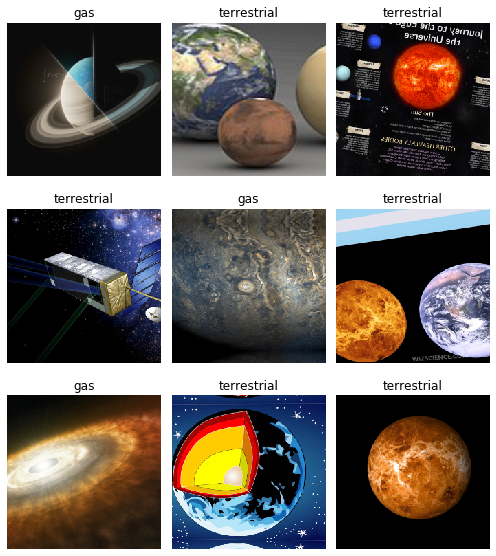

In [10]:
data.show_batch(rows=3, figsize=(7,8),num_workers=0 )

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gas', 'terrestrial'], 2, 302, 75)

## 3 Train Model

We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. We will be using the Resnet architecture, which is a state-of-the-art architecture. You can check that top positions from Stanford DAWN Benchmark for image classification are from models which used it.

In [10]:
# Create our cnn using that data, using resnet 34, printing the error_rate metric each time.
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [30]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.823200,1.248218,0.546667,01:53
1,0.681195,0.968461,0.373333,01:52
2,0.594301,0.740986,0.280000,01:39
3,0.523322,0.685402,0.213333,01:50


In [31]:
# After some progress, we can save our current status so we can easily revert back to it if we need it.
learn.save('stage-1')

In [32]:
# Unfreeze to tetrain all layers of NN
learn.unfreeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


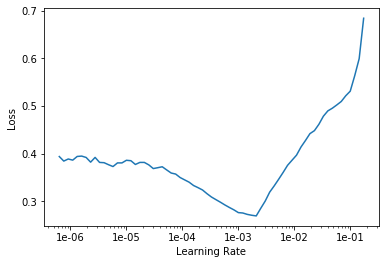

In [34]:
# Learning Rate
learn.recorder.plot()

In [35]:
doc(fit_one_cycle)

fit_one_cycle [source] [test] fit_one_cycle ( learn : Learner , cyc_len : int , max_lr : Union [ float , Collection [ float ], slice ]= slice(None, 0.003, None) , moms : Point = (0.95, 0.85) , div_factor : float = 25.0 , pct_start : float = 0.3 , final_div : float = None , wd : float = None , callbacks : Optional [ Collection [ Callback ]]= None , tot_epochs : int = None , start_epoch : int = None ) 
 
 × Tests found for fit_one_cycle : pytest -sv tests/test_train.py::test_fit_one_cycle [source] To run tests please refer to this guide . Fit a model following the 1cycle policy. 
 Show in docs

In [38]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,4e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.411482,0.667450,0.186667,02:05
1,0.355109,0.649864,0.173333,03:09


In [40]:
learn.save('stage-2')

# 4. Interpretation

In [11]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (302 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
gas,gas,gas,gas,gas
Path: planets_data;

Valid: LabelList (75 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
terrestrial,terrestrial,terrestrial,gas,gas
Path: planets_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

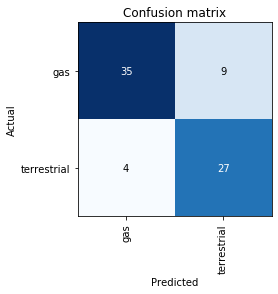

In [15]:
interp.plot_confusion_matrix()

In [13]:
learn.save('stage-3')

In [14]:
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (302 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
gas,gas,gas,gas,gas
Path: planets_data;

Valid: LabelList (75 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
terrestrial,terrestrial,terrestrial,gas,gas
Path: planets_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

# 5. Cleaning Up - Reducing the noise in our data

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be. Using the `FileCleaner` widget from `fastai.widgets`, which is an [IPyhton widget](https://ipywidgets.readthedocs.io/en/stable/) we can prune our top losses, removing photos that do not belong. 
First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [15]:
import ipywidgets

from fastai.widgets import *

In [16]:
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]  # X - image file names , y - labels
# This is going to give us the filenames of the dataset ordered by which ones have the higher loss

We can then pass in these paths to our [widget](https://docs.fast.ai/widgets.image_cleaner.html)

In [17]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

Then we create a new learner to use our new databunch with all the images.

In [18]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [19]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

With the help of FastAi's convenient ImageCleaner widget, we can manualy delete or reclassify the images that got the most losses in training and validation:

In [20]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

In [ ]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .no_split()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

___

# 6. Putting Model in production